## Data 

### US Housing Market Factors

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-CD0198EN-SkillsNetwork/labs/images/housing-cover.jpg" width="30%" alt="housing image">

US housing market depends on various factors. Here are some macroeconomic factors relevant to the market. The following attributes have been collected,

 - `Date`: Year 

 - `House_Price_Index`: House price change according to the index base period set (you can check the date at which this value is 100). 

 - `Stock_Price_Index`: Stock price change according to the index base period set (you can check the date at which this value is 100). 

 - `Consumer_Price_Index`: The Consumer Price Index measures the overall change in consumer prices based on a representative basket of goods and services over time. 

 - `Population`: Population of USA (unit: thousands). 

 - `Unemployment_Rate`: Unemployment rate of USA (unit: percentage). 

 - `Real_GDP`: GDP with adjusted inflation (Annual version unit: billions of chain 2012 dollars in, Monthly version unit: Annualised change). 

 - `Mortgage_Rate`: Interest charged on mortgages (unit: percentage). 

 - `Real_Disposable_Income` (Real Disposable Personal Income): Money left from salary after all the taxes are paid (unit: billions of chain 2012 dollars). 
 
Your task is to load the data, pre-process it, explore and visualize it


Import numpy, pandas and matplotlib libraries into Jupyter 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


Create a dataframe from a csv file and display the size of the dataframe 


In [6]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-CD0198EN-SkillsNetwork/labs/data/Annual_Macroeconomic_Factors.csv'


In [57]:

data = pd.read_csv(url)
data.size


423

Create a reduced dataframe by dropping Stock_Price_Index


In [10]:
data_reduced=data.drop(["Stock_Price_Index"],axis=1)
data_reduced.head()

,Date,House_Price_Index,Consumer_Price_Index,Population,Unemployment_Rate,Real_GDP,Mortgage_Rate,Real_Disposable_Income
0,1975-01-01,61.0900,65.30488,0.98599,8.46667,5648.462,9.04712,19908
1,1976-01-01,65.5250,69.05653,0.95022,7.71667,5952.809,8.86585,20346
2,1977-01-01,73.4350,73.54636,1.00577,7.06667,6228.076,8.84519,20780
3,1978-01-01,83.7450,79.15866,1.05957,6.06667,6572.819,9.64173,21497
4,1979-01-01,95.1325,88.06755,1.10358,5.83333,6780.924,11.20365,21672


Create a smaller dataframe by dropping data that has Unemployment_Rate > 9.5% 


In [11]:
data_reduced_subset= data.drop(data[data["Unemployment_Rate"]> 9.5].index)
data_reduced_subset.head()

,Date,House_Price_Index,Stock_Price_Index,Consumer_Price_Index,Population,Unemployment_Rate,Real_GDP,Mortgage_Rate,Real_Disposable_Income
0,1975-01-01,61.0900,67.14653,65.30488,0.98599,8.46667,5648.462,9.04712,19908
1,1976-01-01,65.5250,79.96264,69.05653,0.95022,7.71667,5952.809,8.86585,20346
2,1977-01-01,73.4350,78.82540,73.54636,1.00577,7.06667,6228.076,8.84519,20780
3,1978-01-01,83.7450,78.84679,79.15866,1.05957,6.06667,6572.819,9.64173,21497
4,1979-01-01,95.1325,85.63207,88.06755,1.10358,5.83333,6780.924,11.20365,21672


Get the dimensions of the dataframe created in Question 4 


In [12]:
data_reduced_subset.size

396

Create a dataframe by selecting Real_Disposable_Income and House_Price_Index attributes from the original dataset and print out the statistics for these attributes 


In [19]:
disp_income_data = data[["Real_Disposable_Income","House_Price_Index"]]
disp_income_data.describe()

,Real_Disposable_Income,House_Price_Index
count,47.000000,47.000000
mean,32040.936170,240.145585
std,8006.301392,120.405988
min,19908.000000,61.090000
25%,25432.500000,140.788750
50%,31712.000000,211.462500
75%,38235.000000,339.353750
max,48219.000000,523.260000


Plot a scatter plot between House_Price_Index and Real_Disposable_Income 


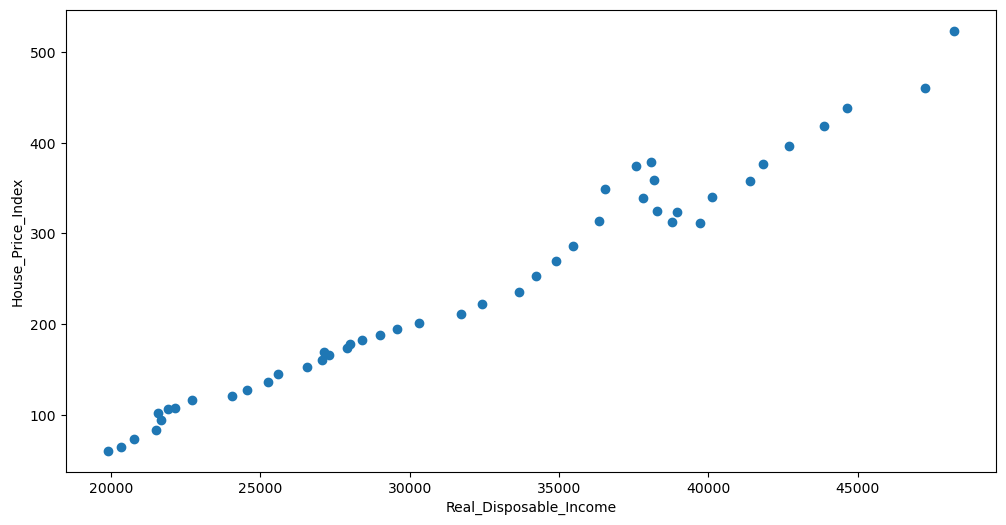

In [27]:
plt.figure(figsize=(12,6))
x=data["Real_Disposable_Income"]
y=data["House_Price_Index"]
plt.scatter(x,y)
plt.xlabel("Real_Disposable_Income")
plt.ylabel("House_Price_Index")
plt.show()

Create a bar chart with date (as year) on X-axis and Real_GDP on the Y-axis 


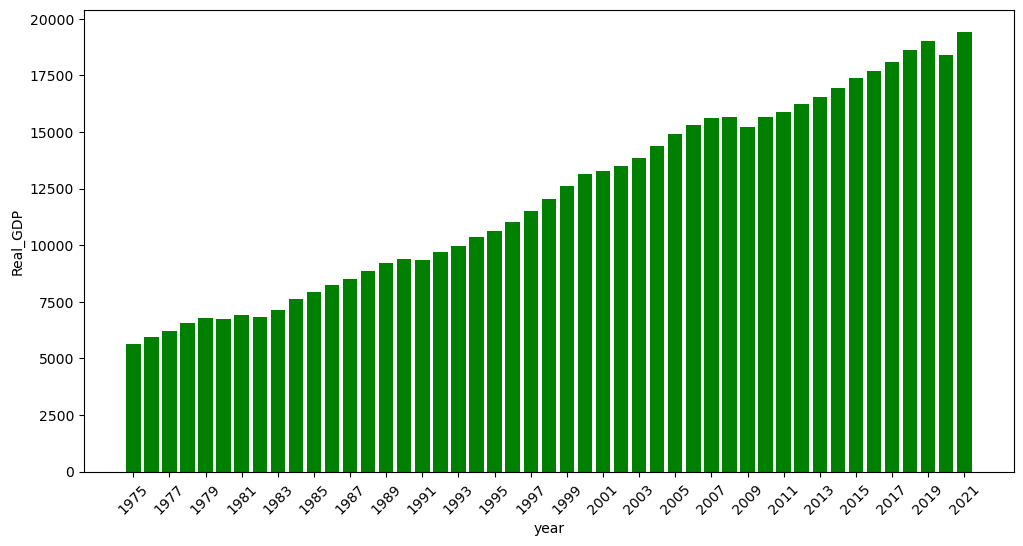

In [36]:
plt.figure(figsize=(12,6))
x=pd.DatetimeIndex(data["Date"]).year
y=data["Real_GDP"]
plt.bar(x,y,color="green")
plt.xlabel("year")
years = sorted(x.unique())
plt.xticks(rotation=45,ticks=years[::2])
plt.ylabel("Real_GDP")
plt.show()

Create a combo chart with date on X-axis and Consumer_Price_Index on Y1-axis (bar) and Mortgage_Rate (line) on Y2-axis 


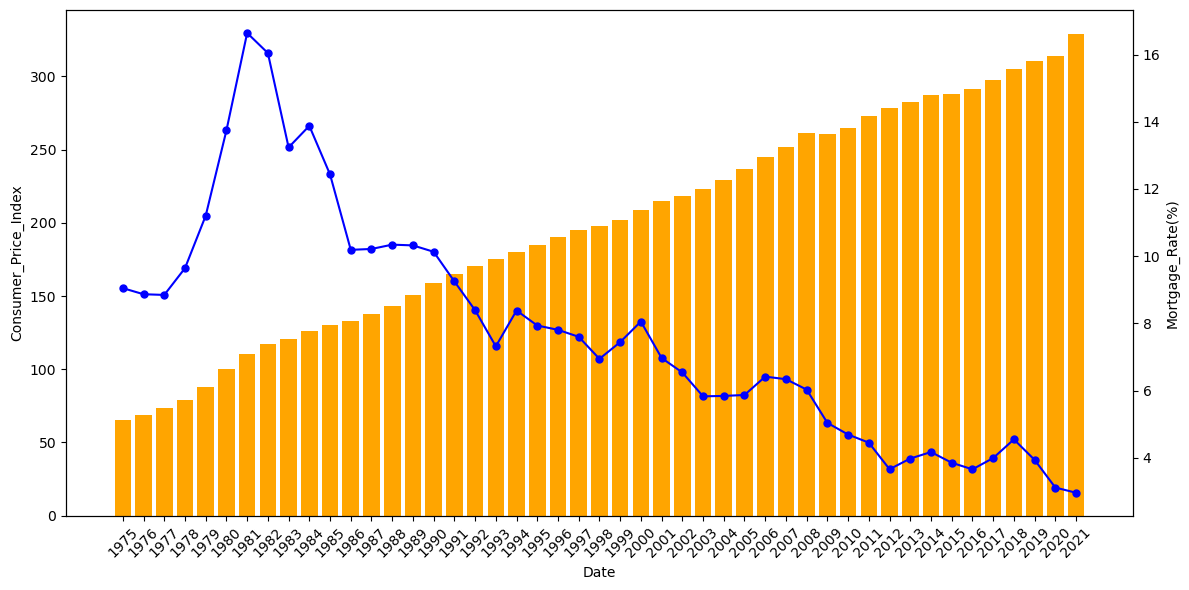

In [54]:
years = pd.DatetimeIndex(data["Date"]).year
fig, ax1 = plt.subplots(figsize=(12, 6))
x=pd.DatetimeIndex(data['Date']).year
y1=data['Consumer_Price_Index']
y2=data['Mortgage_Rate']

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  
ax1.bar(x,y1, color="orange")
ax2.plot(x,y2, color="blue", marker=".", markersize=10)
ax1.set_xlabel("Date")
ax1.set_xticks(years)
ax1.set_xticklabels(years, rotation=45)
ax1.set_ylabel("Consumer_Price_Index")
ax2.set_ylabel("Mortgage_Rate(%)")
plt.tight_layout()
plt.show()

Create sub-plots with Date on X-axis and Stock_Price_Index on subplot 1 and Consumer_Price_Index on subplot 2


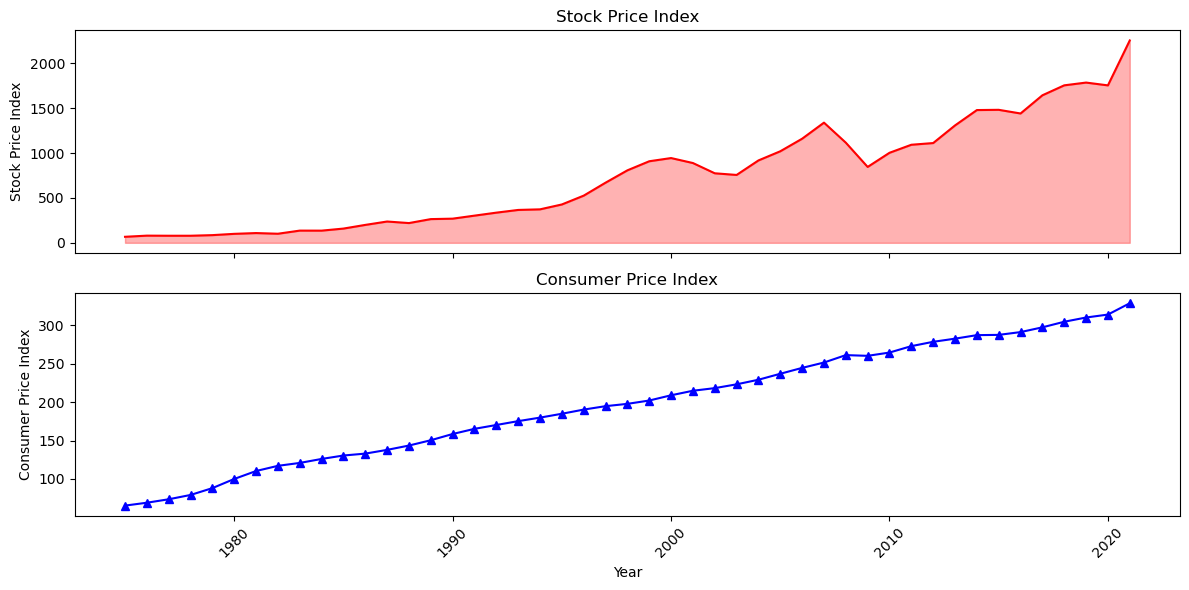

In [56]:
x0 = pd.DatetimeIndex(data['Date']).year
x1 = data['Stock_Price_Index']
x2 = data['Consumer_Price_Index']

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 6))

ax1.plot(x0, x1, color='red')
ax1.fill_between(x0, x1, color='red', alpha=0.3)
ax1.set_title("Stock Price Index")
ax1.set_ylabel("Stock Price Index")

ax2.plot(x0, x2, marker='^', color='blue')
ax2.set_title("Consumer Price Index")
ax2.set_ylabel("Consumer Price Index")
ax2.set_xlabel("Year")

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

```## Change Log| Date (YYYY-MM-DD) | Version | Changed By | Change Description| ----------------- | ------- | ---------- | ---------------------------------------------------------- || 2022-01-24        | 1.2     | Lakshmi     | Added logo and piplite updates |
```

## <h3 align="left"> © Copyright IBM Corporation. All rights reserved. <h3/>
